#### World Bank Development Indicators Analysis  
#### Author: Adeyeye Blessing Temidayo 
#### CIN: PIT/DEC25/10676 
#### Data Source:  World Bank Open Data  

#### Project Overview  
This project applies a structured data science workflow to analyze selected World Bank development indicators.  
The objective is to explore trends, regional patterns, and socioeconomic insights across countries and years.


####  Research & Problem Understanding  
The purpose of this analysis is to:
- Understand global development trends using World Bank indicators  
- Compare countries and regions over time  
- Identify meaningful patterns that can inform policy and research  


## Environment Setup & Libraries  
The following libraries are used for data manipulation, analysis, and visualization.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


pd.set_option('Display.max_rows', None)
pd.set_option('future.no_silent_downcasting', True)

## Data Acquisition & Loading  
The dataset is loaded from a processed World Bank CSV file. Initial inspection ensures the data is correctly imported.


In [2]:
# Load dataset
df_data = pd.read_excel('API_SP.POP.TOTL_DS2_en_excel_v2_61.xls', skiprows=3)
df_meta = pd.read_csv('Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_38144 (3).csv')


## Initial Data Exploration  
This section examines the structure, size, and basic statistics of the dataset.


##### Dataset inspection

In [3]:
# Display the first 5 rows of the dataset
df_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107995.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750491370.0,769280888.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0


In [4]:
# Display the first 5 rows of the dataset
df_meta.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [5]:
# To get the number of rows, columns, data types and non-missing values in the dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [6]:
# To get the number of rows, columns, data types and non-missing values in the dataset
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   Region        217 non-null    object 
 2   IncomeGroup   215 non-null    object 
 3   SpecialNotes  129 non-null    object 
 4   TableName     265 non-null    object 
 5   Unnamed: 5    0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 12.6+ KB


In [7]:
# Merge the population data (df_data) with the metadata on the Country Code
df_merged = pd.merge(df_data, df_meta[['Country Code', 'Region', 'IncomeGroup']], on='Country Code')

In [8]:
# View the first 5 rows of the merged dataset
df_merged.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2017,2018,2019,2020,2021,2022,2023,2024,Region,IncomeGroup
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107995.0,Latin America & Caribbean,High income
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750491370.0,769280888.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,"Middle East, North Africa, Afghanistan & Pakistan",Low income
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,Sub-Saharan Africa,Lower middle income


In [9]:
# The shape of the merged dataset indicating the number of rows and columns
print(f"The dataset has: {df_merged.shape} \n rows and columns")

The dataset has: (265, 71) 
 rows and columns


In [10]:
# Inspection of the columns to identify what columns are not needed.
df_merged.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Region', 'IncomeGroup'],
      dtype='object')

In [11]:
# Data reshaping
id_columns = [
    'Country Name',
    'Country Code',
    'Indicator Name',
    'Indicator Code',
    'Region',
    'IncomeGroup'
]

In [12]:
# Converting the dataframe from wide to long
df_long = df_merged.melt(
    id_vars=id_columns,
    var_name='Year',
    value_name='Population'
)

In [13]:
# The first 5 rows of the reshaped dataset
df_long.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Region,IncomeGroup,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,Latin America & Caribbean,High income,1960,54922.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,NaN,NaN,1960,130075728.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,"Middle East, North Africa, Afghanistan & Pakistan",Low income,1960,9035043.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,NaN,NaN,1960,97630925.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,Sub-Saharan Africa,Lower middle income,1960,5231654.0


In [14]:
# Sort the data by year 
df_sorted = df_long
df_sorted.sort_values(by='Year', inplace=True)

# The first 5 rows of the sorted dataset
df_sorted.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Region,IncomeGroup,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,Latin America & Caribbean,High income,1960,54922.0
168,Malaysia,MYS,"Population, total",SP.POP.TOTL,East Asia & Pacific,Upper middle income,1960,7956197.0
169,North America,NAC,"Population, total",SP.POP.TOTL,NaN,NaN,1960,198622564.0
170,Namibia,NAM,"Population, total",SP.POP.TOTL,Sub-Saharan Africa,Lower middle income,1960,591465.0
171,New Caledonia,NCL,"Population, total",SP.POP.TOTL,East Asia & Pacific,High income,1960,79819.0


## Data Quality Assessment  
We assess the dataset for missing values, inconsistencies, and potential quality issues.


In [15]:
# Percentage of the missing values in the dataset
percentage_of_missingValues = (df_sorted.isnull().sum() / len(df_sorted))*100
print(f"The pecentage of the missing values in: {percentage_of_missingValues}")

The pecentage of the missing values in: Country Name       0.000000
Country Code       0.000000
Indicator Name     0.000000
Indicator Code     0.000000
Region            18.113208
IncomeGroup       18.867925
Year               0.000000
Population         0.174165
dtype: float64


In [16]:
# The number of missing values in the dataset
print(f"No of missing values in the dataset: {df_sorted.isnull().sum()}")

No of missing values in the dataset: Country Name         0
Country Code         0
Indicator Name       0
Indicator Code       0
Region            3120
IncomeGroup       3250
Year                 0
Population          30
dtype: int64


## Data Cleaning & Preprocessing  
This stage handles missing values, column standardization, and data type corrections to prepare the dataset for analysis.


In [17]:
# Drop the missing values from the columns: 'Region', & 'IncomeGroup'
df_clean = df_sorted.dropna(subset=['Region', 'IncomeGroup']).copy()

# Fill the missing value in the 'Population' column with the median of the column  
df_clean['Population'] = df_clean['Population'].fillna(df_clean['Population'].median())


In [18]:
# Check if missing values have all been sorted out
df_clean.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
Region            0
IncomeGroup       0
Year              0
Population        0
dtype: int64

In [19]:
# change the datatype of the "Year" and "Population" columns.
df_sorted['Year'] = df_sorted['Year'].astype(int)
df_sorted['Population'] =pd.to_numeric (df_sorted['Population'])
df_sorted.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Region,IncomeGroup,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,Latin America & Caribbean,High income,1960,54922.0
168,Malaysia,MYS,"Population, total",SP.POP.TOTL,East Asia & Pacific,Upper middle income,1960,7956197.0
169,North America,NAC,"Population, total",SP.POP.TOTL,NaN,NaN,1960,198622564.0
170,Namibia,NAM,"Population, total",SP.POP.TOTL,Sub-Saharan Africa,Lower middle income,1960,591465.0
171,New Caledonia,NCL,"Population, total",SP.POP.TOTL,East Asia & Pacific,High income,1960,79819.0


In [20]:
# Drop columns not important to our analysis
df_sorted.drop(columns=['Indicator Name', 'Indicator Code'], inplace=True)

In [21]:
# populations from 1960 to 2024 across contries and region
population_1960 = df_sorted[df_sorted['Year'] == 1960][['Country Name', 'Region', 'Population']].rename(columns={'Population': 'Pop_1960'})
population_2024 = df_sorted[df_sorted['Year'] == 2024][['Country Name', 'Population']].rename(columns={'Population': 'Pop_2024'})

growths_df = population_1960.merge(population_2024, on='Country Name')

# Calculate Growth
growths_df['Percentage_Growth'] = ((growths_df['Pop_2024'] - growths_df['Pop_1960']) / growths_df['Pop_1960']) * 100

print(growths_df.head())

    Country Name                     Region     Pop_1960     Pop_2024  \
0          Aruba  Latin America & Caribbean      54922.0     107995.0   
1       Malaysia        East Asia & Pacific    7956197.0   35557673.0   
2  North America                        NaN  198622564.0  381464223.0   
3        Namibia         Sub-Saharan Africa     591465.0    3030131.0   
4  New Caledonia        East Asia & Pacific      79819.0     292639.0   

   Percentage_Growth  
0          96.633407  
1         346.917956  
2          92.054828  
3         412.309435  
4         266.628246  


In [22]:
# Population growth in the last decades for all countries

decade_years = [1960, 1970, 1980, 1990, 2000, 2010, 2020, 2024]

# function to calculate growth between two years
def calculate_decade_growth(df_clean, start_year, end_year):
    start_data = df_sorted[df_clean['Year'] == start_year][['Country Name', 'Population']].rename(columns={'Population': f'Pop_{start_year}'})
    end_data = df_sorted[df_clean['Year'] == end_year][['Country Name', 'Population']].rename(columns={'Population': f'Pop_{end_year}'})
    
    merged = start_data.merge(end_data, on='Country Name')
    merged[f'Growth_{start_year}_{end_year}'] = (
        (merged[f'Pop_{end_year}'] - merged[f'Pop_{start_year}']) / merged[f'Pop_{start_year}'] * 100)
    
    return merged[['Country Name', f'Growth_{start_year}_{end_year}']]

# Growth for each decade
all_growth = None
for i in range(len(decade_years)-1):
    start = decade_years[i]
    end = decade_years[i+1]
    
    decade_growth = calculate_decade_growth(df_sorted, start, end)
    
    if all_growth is None:
        all_growth = decade_growth
    else:
        all_growth = all_growth.merge(decade_growth, on='Country Name')

print("\n Decade-wise Growth Rates ")
print(all_growth.head(10))

print("\n Summary Statistics for Each Decade ")
growth_columns = [col for col in all_growth.columns if col.startswith('Growth_')]
print(all_growth[growth_columns].describe())

print("\n Average Growth by Decade ")
for col in growth_columns:
    avg = all_growth[col].mean()
    median = all_growth[col].median()
    print(f"{col}:")
    print(f"  Average: {avg:.2f}%")
    print(f"  Median: {median:.2f}%")

print("\n--- Top 5 Countries Each Decade ---")
for col in growth_columns:
    print(f"\n{col}:")
    top5 = all_growth.nlargest(5, col)[['Country Name', col]]
    for idx, row in top5.iterrows():
        print(f"  {row['Country Name']}: {row[col]:.2f}%")


 Decade-wise Growth Rates 
    Country Name  Growth_1960_1970  Growth_1970_1980  Growth_1980_1990  \
0          Aruba          7.334037          1.626802          4.747200   
1       Malaysia         27.935520         27.552958         37.354020   
2  North America         13.999195         11.202767         10.158035   
3        Namibia         28.134040         29.499332         39.520640   
4  New Caledonia         36.982423         37.021895         17.781026   
5          Niger         32.673571         31.948562         35.040713   
6        Nigeria         24.060258         31.972761         31.663252   
7      Nicaragua         35.946240         34.226816         27.984109   
8    Netherlands         13.510445          8.523003          5.665875   
9         Norway          8.224081          5.414598          3.814672   

   Growth_1990_2000  Growth_2000_2010  Growth_2010_2020  Growth_2020_2024  
0         44.356445         12.418863          6.627192         -0.545185  
1    

##  Exploratory Data Analysis (EDA)  
Visual and statistical exploration is conducted to identify trends, distributions, and relationships.


In [23]:

# A new column 'Population_change' to store the population given by the formula for Year-over-year growth
df_sorted['Population_change'] = df_sorted['Population'].diff()

In [24]:
# A new column 'Growth_rate%' to calculate the growth rate in percentage as given by the formula.
df_sorted['Growth_rate%'] = (df_sorted['Population_change'] / df_sorted['Population'].shift(1)) * 100 # pyright: ignore[reportUndefinedVariable]

In [25]:
# To get the missing values in the dataset
df_sorted.isnull().sum()

Country Name            0
Country Code            0
Region               3120
IncomeGroup          3250
Year                    0
Population             30
Population_change      61
Growth_rate%           61
dtype: int64

In [26]:
# Remove all missing values in the dataset
df_clean = df_sorted.dropna()

In [27]:
# View the first 5 rows of the dataset
df_clean.head()

,Country Name,Country Code,Region,IncomeGroup,Year,Population,Population_change,Growth_rate%
168,Malaysia,MYS,East Asia & Pacific,Upper middle income,1960,7956197.0,7901275.0,14386.357015
170,Namibia,NAM,Sub-Saharan Africa,Lower middle income,1960,591465.0,-198031099.0,-99.702217
171,New Caledonia,NCL,East Asia & Pacific,High income,1960,79819.0,-511646.0,-86.504865
172,Niger,NER,Sub-Saharan Africa,Low income,1960,3505050.0,3425231.0,4291.247698
173,Nigeria,NGA,Sub-Saharan Africa,Lower middle income,1960,45053782.0,41548732.0,1185.396271


In [28]:
print(f"No of missing values in the dataset: {df_clean.isnull().sum()}")

No of missing values in the dataset: Country Name         0
Country Code         0
Region               0
IncomeGroup          0
Year                 0
Population           0
Population_change    0
Growth_rate%         0
dtype: int64


In [29]:

# A new column 'Population_change' to store the population given by the formula for Year-over-year growth
df_sorted['Population_change'] = df_sorted['Population'].diff()

In [30]:
# A new column 'Growth_rate%' to calculate the growth rate in percentage as given by the formula.
df_sorted['Growth_rate%'] = (df_sorted['Population_change'] / df_sorted['Population'].shift(1)) * 100 # pyright: ignore[reportUndefinedVariable]

In [31]:
# Check for missing values in the reshaped dataset with added columns
df_sorted.isnull().sum()

Country Name            0
Country Code            0
Region               3120
IncomeGroup          3250
Year                    0
Population             30
Population_change      61
Growth_rate%           61
dtype: int64

In [32]:
# Remove missing values from the columns with missing values
df_clean = df_sorted.dropna(subset=['Population_change', 'Growth_rate%', 'Population', 'Region', 'IncomeGroup' ])
df_clean.isnull().sum()


Country Name         0
Country Code         0
Region               0
IncomeGroup          0
Year                 0
Population           0
Population_change    0
Growth_rate%         0
dtype: int64

In [33]:
# Shape of dataset with no missing values
print(f"The new shape of the dataset is now: {df_clean.shape} after cleaning")

The new shape of the dataset is now: (13929, 8) after cleaning


In [34]:
# The last 5 rows of the selected columns dataset
print(df_clean[['Year', 'Population', 'Population_change', 'Growth_rate%']].tail())

       Year  Population  Population_change  Growth_rate%
17053  2024    167777.0      -1.823858e+07    -99.088483
17054  2024    831087.0       6.633100e+05    395.352164
17056  2024   7524100.0      -1.410318e+09    -99.469327
17042  2024   3699557.0      -3.824543e+06    -50.830571
17224  2024  16634373.0       1.293482e+07    349.631483


## Aggregation & Comparative Analysis  
The data is grouped to compare indicators across countries, regions, and income groups.


In [35]:

#  I copied the dataset to maintain the dataframe and minimize the chance of errors.
df_clean = df_clean.copy()

# Calculate year-over-year growth
df_clean['YoY_Growth'] = df_clean.groupby('Country Name')['Population'].pct_change() * 100

# Calculate growth from previous decade
df_clean['Decade_Growth'] = df_clean.groupby('Country Name')['Population'].pct_change(periods=10) * 100

print("\n Year-over-Year Growth ")
print(df_clean[df_clean['Year'].isin([2020, 2021, 2022, 2023, 2024])].head(20))


 Year-over-Year Growth 
           Country Name Country Code  \
16079       New Zealand          NZL   
16078             Nauru          NRU   
16077             Nepal          NPL   
16076            Norway          NOR   
16075       Netherlands          NLD   
16074         Nicaragua          NIC   
16071     New Caledonia          NCL   
16072             Niger          NER   
16070           Namibia          NAM   
16068          Malaysia          MYS   
16073           Nigeria          NGA   
16081              Oman          OMN   
16083          Pakistan          PAK   
16084            Panama          PAN   
16085              Peru          PER   
16086       Philippines          PHL   
16087             Palau          PLW   
16088  Papua New Guinea          PNG   
16089            Poland          POL   
16091  Puerto Rico (US)          PRI   

                                                  Region          IncomeGroup  \
16079                                East Asia & Paci

In [36]:
# Population of 1960 and 2024
population_1960 = df_clean[df_clean['Year'] == 1960][['Country Name', 'Population']].rename(columns={'Population': 'Population_1960'})
population_2024 = df_clean[df_clean['Year'] == 2024][['Country Name', 'Population']].rename(columns={'Population': 'Population_2024'})

In [37]:
# Merge the "population_1960" and "population_2024" data on the "Country Name" column
growth_df = population_1960.merge(population_2024, on='Country Name')

In [38]:
# View the first 5 rows of the data
growth_df.head()

,Country Name,Population_1960,Population_2024
0,Malaysia,7956197.0,35557673.0
1,Namibia,591465.0,3030131.0
2,New Caledonia,79819.0,292639.0
3,Niger,3505050.0,27032412.0
4,Nigeria,45053782.0,232679478.0


In [39]:
# Calculate the absolute growth of the population using the formula below
growth_df['Absolute_Growth'] = growth_df['Population_2024'] - growth_df['Population_1960']
growth_df['Percentage_Growth'] = ((growth_df['Population_2024'] - growth_df['Population_1960']) / growth_df['Population_1960']) * 100


In [40]:
# Compound Annual Growth Rate
growth_df['CAGR'] = (((growth_df['Population_2024'] / growth_df['Population_1960']) ** (1/64)) - 1) * 100
print(growth_df.head(10))

    Country Name  Population_1960  Population_2024  Absolute_Growth  \
0       Malaysia        7956197.0       35557673.0       27601476.0   
1        Namibia         591465.0        3030131.0        2438666.0   
2  New Caledonia          79819.0         292639.0         212820.0   
3          Niger        3505050.0       27032412.0       23527362.0   
4        Nigeria       45053782.0      232679478.0      187625696.0   
5      Nicaragua        1782370.0        6916140.0        5133770.0   
6    Netherlands       11486631.0       17993485.0        6506854.0   
7         Norway        3581239.0        5572279.0        1991040.0   
8          Nepal       10123658.0       29651054.0       19527396.0   
9          Nauru           4607.0          11947.0           7340.0   

   Percentage_Growth      CAGR  
0         346.917956  2.366961  
1         412.309435  2.585609  
2         266.628246  2.050710  
3         671.241837  3.243413  
4         416.448271  2.598508  
5         288.030544

In [41]:
# Top 10 fastest growing countries
print("\nTop 10 Fastest Growing Countries")
print(growth_df.nlargest(10, 'Percentage_Growth')[['Country Name', 'Percentage_Growth']])


Top 10 Fastest Growing Countries
                  Country Name  Percentage_Growth
137       United Arab Emirates        8265.236725
49                       Qatar        7836.189947
96   Sint Maarten (Dutch part)        1496.685083
180                     Kuwait        1474.378898
79                Saudi Arabia        1349.463600
123                   Djibouti        1258.599926
171                     Jordan        1253.634277
11                        Oman         895.605531
150                    Bahrain         860.054872
119             Cayman Islands         783.448030


In [42]:
# Top 10 slowest growing countries
print("\nTop 10 Slowest Growing Countries")
print(growth_df.nsmallest(10, 'Percentage_Growth')[['Country Name', 'Percentage_Growth']])


Top 10 Slowest Growing Countries
               Country Name  Percentage_Growth
149                Bulgaria         -18.124891
178     St. Kitts and Nevis         -16.067013
31                   Latvia         -12.015913
60                  Ukraine         -11.591307
185                 Croatia          -6.617609
161                 Hungary          -4.221430
152  Bosnia and Herzegovina          -3.569473
88                   Serbia          -0.791024
197                 Georgia           1.480058
50                  Romania           3.503571


#### Function to calculate growth rate of selected countries

In [43]:
# Function to help calculate selected countries
def calculate_period_growth(df_clean, country, start_year, end_year):
    """Calculate growth for a specific country and time period"""
    start_pop = df_clean[(df_clean['Country Name'] == country) & (df_clean['Year'] == start_year)]['Population'].values
    end_pop = df_clean[(df_clean['Country Name'] == country) & (df_clean['Year'] == end_year)]['Population'].values
    
    if len(start_pop) > 0 and len(end_pop) > 0:
        growth = ((end_pop[0] - start_pop[0]) / start_pop[0]) * 100
        return growth
    return None

countries_to_check = ['China', 'India', 'United States', 'Nigeria', 'Brazil']
print("\n Growth by Country (1960-2024)")
for country in countries_to_check:
    growth = calculate_period_growth(df_clean, country, 1960, 2024)
    if growth:
        print(f"{country}: {growth:.2f}%")


 Growth by Country (1960-2024)
China: 111.22%
India: 232.79%
United States: 88.25%
Nigeria: 416.45%
Brazil: 192.86%


In [ ]:
# Population growth and statistical analysis to understand the population growth over decades

decade_years = [1960, 1970, 1980, 1990, 2000, 2010, 2020, 2024]

# function to calculate growth between two years
def calculate_decade_growth(df_clean, start_year, end_year):
    start_data = df_clean[df_clean['Year'] == start_year][['Country Name', 'Population']].rename(columns={'Population': f'Pop_{start_year}'})
    end_data = df_clean[df_clean['Year'] == end_year][['Country Name', 'Population']].rename(columns={'Population': f'Pop_{end_year}'})
    
    merged = start_data.merge(end_data, on='Country Name')
    merged[f'Growth_{start_year}_{end_year}'] = (
        (merged[f'Pop_{end_year}'] - merged[f'Pop_{start_year}']) / merged[f'Pop_{start_year}'] * 100)
    
    return merged[['Country Name', f'Growth_{start_year}_{end_year}']]

# Growth for each decade
all_growth = None
for i in range(len(decade_years)-1):
    start = decade_years[i]
    end = decade_years[i+1]
    
    decade_growth = calculate_decade_growth(df_clean, start, end)
    
    if all_growth is None:
        all_growth = decade_growth
    else:
        all_growth = all_growth.merge(decade_growth, on='Country Name')

print("\n Decade-wise Growth Rates ")
print(all_growth.head(10))

print("\n--- Summary Statistics for Each Decade ---")
growth_columns = [col for col in all_growth.columns if col.startswith('Growth_')]
print(all_growth[growth_columns].describe())

print("\n--- Average Growth by Decade ---")
for col in growth_columns:
    avg = all_growth[col].mean()
    median = all_growth[col].median()
    print(f"{col}:")
    print(f"  Average: {avg:.2f}%")
    print(f"  Median: {median:.2f}%")

print("\n--- Top 5 Countries Each Decade ---")
for col in growth_columns:
    print(f"\n{col}:")
    top5 = all_growth.nlargest(5, col)[['Country Name', col]]
    for idx, row in top5.iterrows():
        print(f"  {row['Country Name']}: {row[col]:.2f}%")


 Decade-wise Growth Rates 
    Country Name  Growth_1960_1970  Growth_1970_1980  Growth_1980_1990  \
0       Malaysia         27.935520         27.552958         37.354020   
1        Namibia         28.134040         29.499332         39.520640   
2  New Caledonia         36.982423         37.021895         17.781026   
3          Niger         32.673571         31.948562         35.040713   
4        Nigeria         24.060258         31.972761         31.663252   
5      Nicaragua         35.946240         34.226816         27.984109   
6    Netherlands         13.510445          8.523003          5.665875   
7         Norway          8.224081          5.414598          3.814672   
8          Nepal         22.842850         25.063263         25.534888   
9          Nauru         45.647927         13.994039         25.794221   

   Growth_1990_2000  Growth_2000_2010  Growth_2010_2020  Growth_2020_2024  
0         28.792664         24.764915         18.264318          4.922209  
1    

In [45]:
# Top 10 populous country for 2024
df_2024 = df_clean[df_clean['Year'] == 2024]

# 5. Get top 10 by population and select specific attributes
top_10_2024 = df_2024.sort_values(by='Population', ascending=False).head(10)
top_10_result = top_10_2024[['Country Name', 'Region', 'Population']]
top_10_result 

,Country Name,Region,Population
17069,India,South Asia,1.450936e+09
17000,China,East Asia & Pacific,1.408975e+09
17210,United States,North America,3.401110e+08
17066,Indonesia,East Asia & Pacific,2.834879e+08
17143,Pakistan,"Middle East, North Africa, Afghanistan & Pakistan",2.512692e+08
17133,Nigeria,Sub-Saharan Africa,2.326795e+08
16989,Brazil,Latin America & Caribbean,2.119986e+08
16980,Bangladesh,South Asia,1.735624e+08
17161,Russian Federation,Europe & Central Asia,1.435339e+08
17113,Mexico,Latin America & Caribbean,1.308610e+08


####                         Visualizations

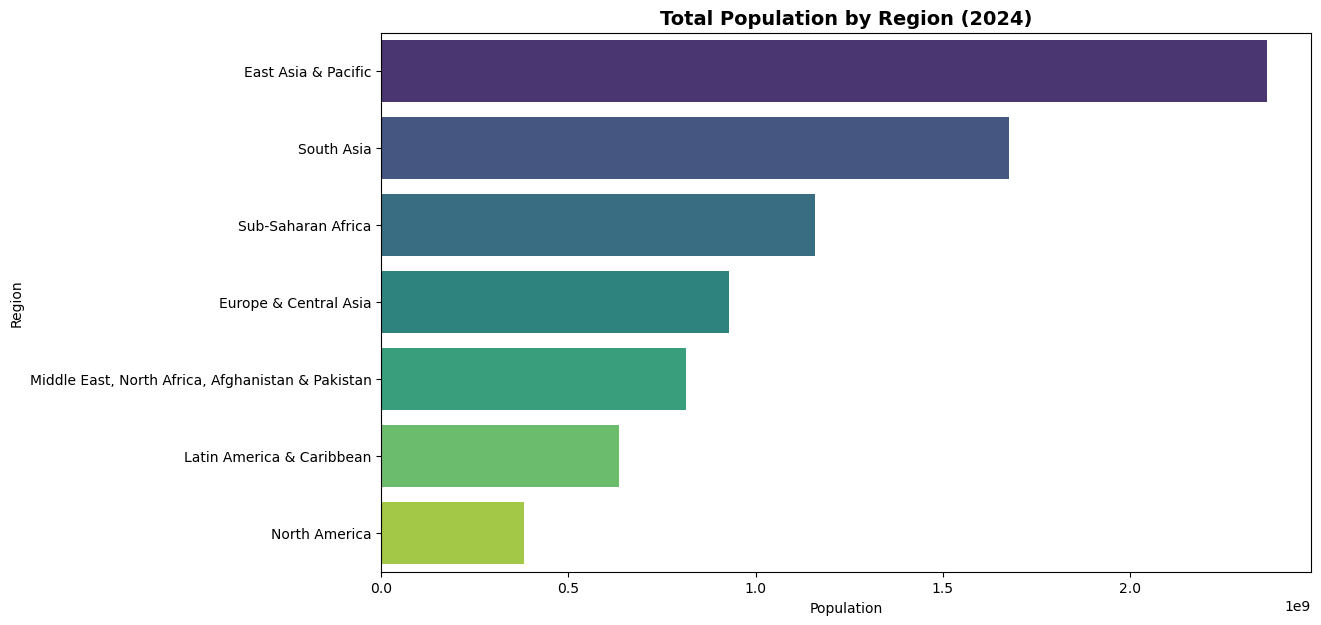

In [72]:
# Regional Distribution of population (2024)
plt.figure(figsize=(12, 7))
region_pop = df_clean[df_clean['Year'] == 2024].groupby('Region')['Population'].sum().sort_values(ascending=False).reset_index()
sns.barplot(
    data=region_pop, 
    x='Population', 
    y='Region', 
    hue='Region',   
    palette='viridis', 
    legend=False     
)

plt.title('Total Population by Region (2024)', fontsize=14, fontweight='bold')
plt.xlabel('Population')
plt.ylabel('Region')
plt.savefig('wb_images/Total Population by Region (2024).png', dpi=300, bbox_inches='tight')
plt.show()

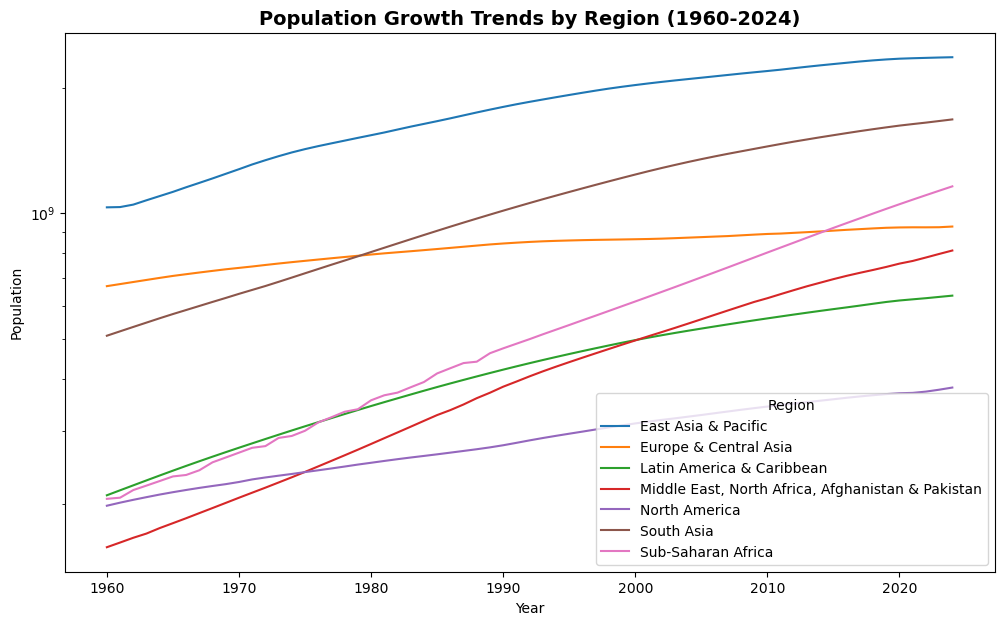

In [71]:
# Growth Trends by Region
plt.figure(figsize=(12, 7))
region_trends = df_clean.groupby(['Region', 'Year'])['Population'].sum().reset_index()
sns.lineplot(data=region_trends, x='Year', y='Population', hue='Region')
plt.yscale('log') # Use log scale to see relative growth across different sizes
plt.title('Population Growth Trends by Region (1960-2024)', fontsize=14, fontweight='bold')
plt.savefig('wb_images/Population Growth Trends by Region (1960-2024).png', dpi=300, bbox_inches='tight')
plt.show()

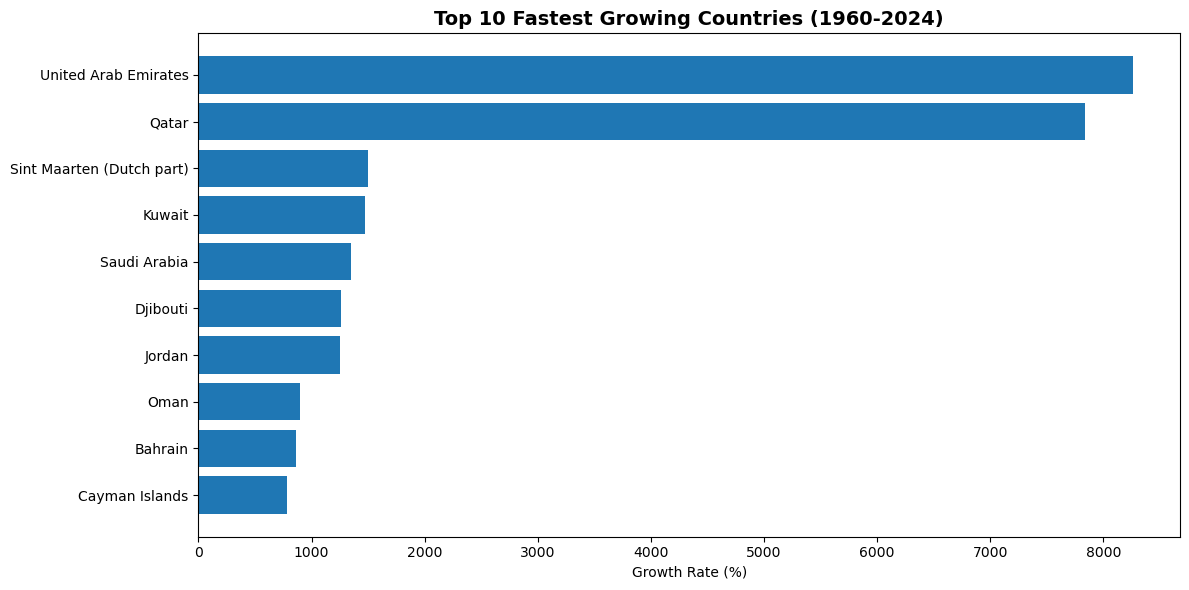

In [70]:
# Plot of the Top 10 Fastest Growing Countries from (1960-2024).
plt.figure(figsize=(12, 6))
top10_growth = growth_df.nlargest(10, 'Percentage_Growth')
plt.barh(top10_growth['Country Name'], top10_growth['Percentage_Growth'])
plt.xlabel('Growth Rate (%)')
plt.title('Top 10 Fastest Growing Countries (1960-2024)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top10_growth.png', dpi=300)
plt.savefig('wb_images/Top 10 Fastest Growing Countries (1960-2024).png', dpi=300, bbox_inches='tight')
plt.show()

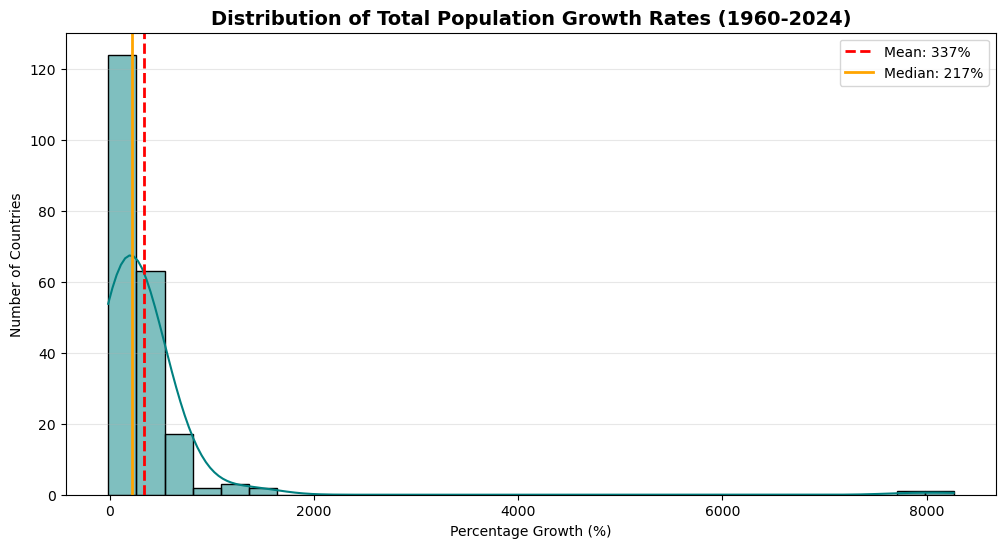

In [69]:
# An histogram showing the distribution of total population growth rates from 1960-2024
plt.figure(figsize=(12, 6))

# Histogram with Kernel Density Estimate (KDE) line
sns.histplot(data=growth_df, x='Percentage_Growth', kde=True, bins=30, color='teal')

# Add mean and median lines for context
mean_growth = growth_df['Percentage_Growth'].mean()
median_growth = growth_df['Percentage_Growth'].median()

plt.axvline(mean_growth, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_growth:.0f}%')
plt.axvline(median_growth, color='orange', linestyle='-', linewidth=2, label=f'Median: {median_growth:.0f}%')

plt.title('Distribution of Total Population Growth Rates (1960-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Percentage Growth (%)')
plt.ylabel('Number of Countries')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.savefig('wb_images/Distribution of Growth Rates by Region.png', dpi=300, bbox_inches='tight')
plt.show()

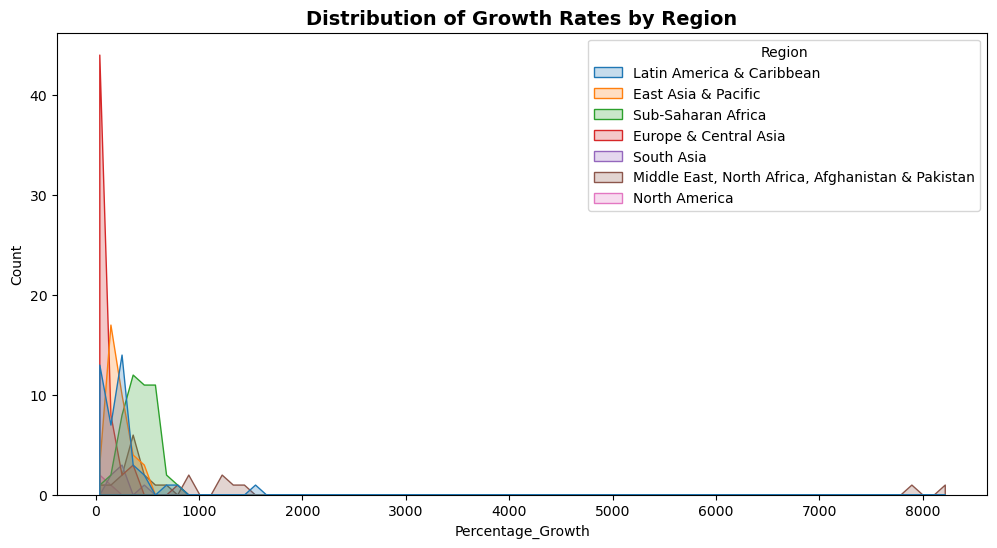

In [68]:
# Plot of distribution growth rate by regions
plt.figure(figsize=(12, 6))
sns.histplot(data=growths_df, x='Percentage_Growth', hue='Region', element="poly")
plt.title('Distribution of Growth Rates by Region', fontsize=14, fontweight='bold')
plt.savefig('wb_images/Distribution of Growth Rates by Region.png', dpi=300, bbox_inches='tight')
plt.show()

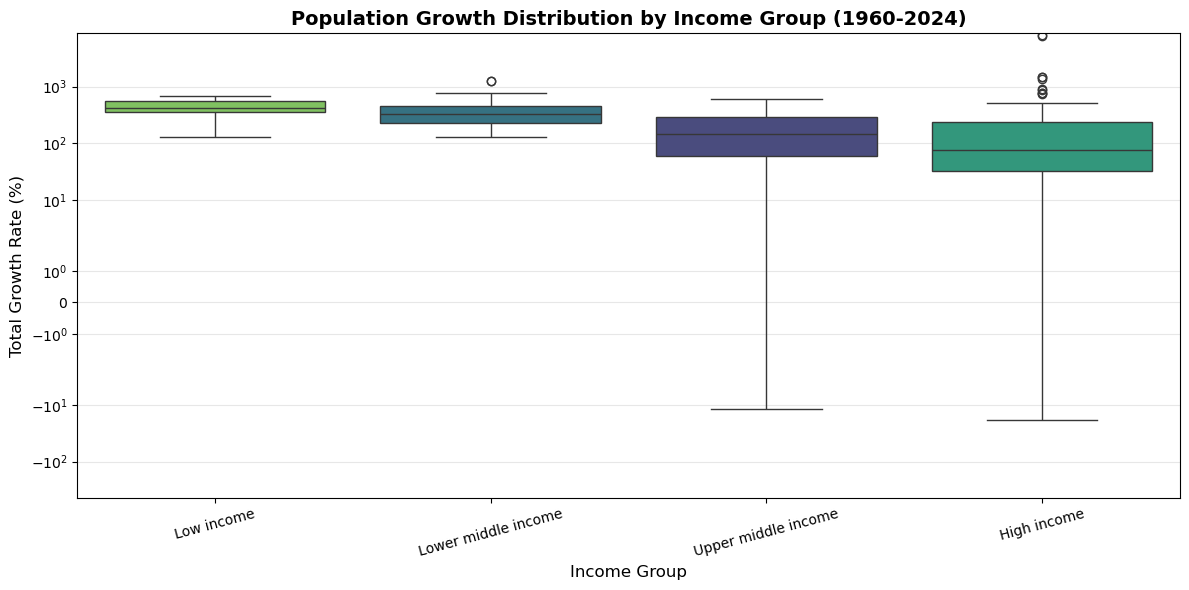

In [66]:
# 2024 Data of countries by 'Country Name', 'Country Code', 'IncomeGroup', and 'Population'.

pops_1960 = df_clean[df_clean['Year'] == 1960][['Country Name', 'Country Code', 'IncomeGroup', 'Population']]
pops_2024 = df_clean[df_clean['Year'] == 2024][['Country Name', 'Population']]

# Merge to compare start and end points
economic_df = pops_1960.merge(pops_2024, on='Country Name', suffixes=('_1960', '_2024'))

# Calculate Percentage Growth
economic_df['Percentage_Growth'] = ((economic_df['Population_2024'] - economic_df['Population_1960']) / economic_df['Population_1960']) * 100

# Growth Distribution by Income Group
plt.figure(figsize=(12, 6))

# Boxplot allows us to see the median and outliers for each group
sns.boxplot(
    data=economic_df, 
    x='IncomeGroup', 
    y='Percentage_Growth', 
    hue='IncomeGroup', 
    palette='viridis',
    order=['Low income', 'Lower middle income', 'Upper middle income', 'High income'] 
)

plt.title('Population Growth Distribution by Income Group (1960-2024)', fontsize=14, fontweight='bold')
plt.ylabel('Total Growth Rate (%)', fontsize=12)
plt.xlabel('Income Group', fontsize=12)
plt.xticks(rotation=15)
plt.yscale('symlog') # 'symlog' handles the massive range of growth rates better than linear
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('wb_images/Population Growth Distribution by Income Group (1960-2024).png', dpi=300, bbox_inches='tight')
plt.show()

In [52]:
# A choropleth map to describe populations of different countries
map_data = economic_df.dropna(subset=['Country Code', 'Percentage_Growth'])

# Interactive Choropleth Map
fig = px.choropleth(
    map_data,
    locations="Country Code",      # The ISO code column to map to countries
    color="Percentage_Growth",     # The value to determine color
    hover_name="Country Name",     # Column to display on hover
    color_continuous_scale=px.colors.sequential.Plasma, # Color scheme
    title="Global Population Growth Rate (1960-2024)",
    projection="natural earth",    # Map projection style
    range_color=[0, 500]           # Cap color scale at 500% to prevent outliers from washing out the map
)


fig.update_layout(
    margin={"r":0,"t":40,"l":0,"b":0},
    coloraxis_colorbar=dict(title="Growth %")
)

fig.show()

#### Findings and Interpretations

The analysis of World Bank development indicators shows variable patterns in population distribution and socioeconomic stratification around the world.

Based on the 2024 population rankings, countries like India, China, the USA, Indonesia, Pakistan, and Nigeria make up a large percentage of the population of the world, and they, in fact, lead in terms of population in relation to other countries.

The classification by regions and income group shows that low- and middle-income countries account for the majority of the world population, especially in Asia and Africa. This implies that population pressure is most experienced by regions characterized by infrastructure, healthcare, and job deficits.


#### Limitations of the Study
Although this provides helpful insights, there are some limitations to this analysis:

1. Limitations of Aggregate
The World Bank data set considers both sovereign nations and aggregate entities. While careful filtering was used, the inclusion of aggregate entities makes filtering more complex and poses potential risks if not filtered in a consistent manner.

2. Missing and Imputed Values
Certain variables, like population and socioeconomic factors, had missing values. Despite employing best practices such as removing rows with missing values and imputing the median of the rows and columns with missing values, there may be a slight bias in the estimation.

3. Temporal Coverage Variance
Not all countries have data for every year. This could impact the analysis for a particular period because the trend analysis might not be uniform.

5. Descriptive Nature of the Analysis
The research is more about exploratory and descriptive analysis. This means that the observed relationships are not meant to imply any causes and effects.



#### Conclusion
This research has been able to utilize the structured data science approach in the analysis of the World Bank development indicators, with a specific emphasis on the distribution of population across the different nations by the year 2024.
The data show that a very large population exists in a handful of countries, some of which are classified as low- and/or middle-income economies. Helping us understand the fact that such a population continues to face challenges with demographics and development as well.



#### Recommendations
Based on the results and limitations of the research, the following recommendations can be proposed:

1. Policy and Planning: In densely populated countries, governments must focus on long-term planning in terms of health, education, housing, and jobs to improve the welfare of their citizens. 

2. Improved Data Reporting. International organizations and national statistical agencies should aim at minimizing missing observations for a more harmonious classification of countries over time. 

3. Extended Indicator Analysis
In future research, attention needs to be given to other demographic and economic factors, such as birth rates, migration, GDP per capita, and urbanization, to gain a complete insight into the developmental process.
 
4. Advanced Analytical Methods. Further studies would require the use of predictive modeling or time series analysis techniques for forecasting future trends and possible future challenges for the population. 

5. Regional Deep Dive Studies. More focused analysis may be helpful on a regional basis, such as the entire Sub-Saharan Africa or the entire South Asia region.

